## MultiClass Target Classification
### A Brief Example with IRIS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
iris = datasets.load_iris()

In [2]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

* 'data' contains values of the features.
* 'feature_names' contains the features' names (independent values)
* 'target' is the values which are desired to predict by the model (labels = dependent values)
* 'target_names' are the options which the model should predict and choose one.

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris_df = pd.DataFrame(data = iris["data"], columns=iris["feature_names"])
iris_df["target"] = iris["target"]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [7]:
iris_df.isna().sum() 

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [8]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


The data contains no missing values.

In [9]:
iris_df.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

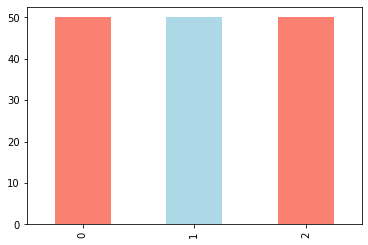

In [10]:
iris_df.target.value_counts().plot(kind="bar",
                                   color=["salmon", "lightblue"]);

In [11]:
#Correlation Matrix can be adopted in order to visualize the patterns of the data:
corr_mat = iris_df.corr() 
corr_mat

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


As seen, all the variables are not highly correlate with each other.

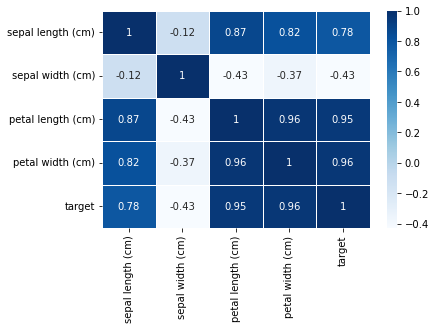

In [12]:
f, ax = plt.subplots()
sns.heatmap(corr_mat,
            annot=True,
            linewidths=0.5,
            cmap="Blues")

plt.show()

**The Model**

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = iris_df.drop("target", axis=1) #Features
y = iris_df["target"] #Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #20% for test data.

#Since the problem is to choose one of the classes which makes it a classification problem, not a regression.
clf = RandomForestClassifier()

#Training
clf.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
#Predictions made by the model:
y_preds = clf.predict(X_test) 
y_preds

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [15]:
#Confusion Matrix in order to summarize the results of the predictions:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_preds)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [16]:
pd.crosstab(y_test, y_preds, rownames=["Actual Values"], colnames=["Predicted Values"])

Predicted Values,0,1,2
Actual Values,,,
0,10,0,0
1,0,9,0
2,0,0,11


The non-diagonal values are where the model is confused and classified incorrectly.  
All test data is classified correctly.

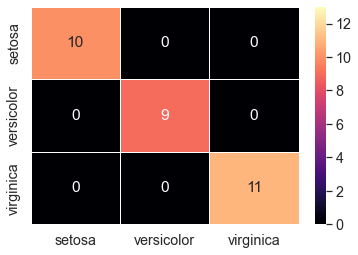

In [17]:
import seaborn as sns
sns.set(font_scale=1.3)
confusion_mat = confusion_matrix(y_test, y_preds)
sns.heatmap(confusion_mat, vmin=0, vmax=13,
            xticklabels=['setosa', 'versicolor', 'virginica'],
            yticklabels=['setosa', 'versicolor', 'virginica'],
            annot=True,
            cmap="magma",
            linewidths=0.5)
plt.show()

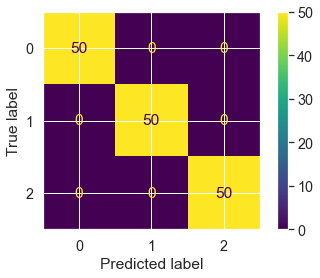

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)
plt.show()

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
cv_score = cross_val_score(clf, X, y, cv=5, scoring=None) #default=mean accuracy
np.mean(cv_score)

0.9666666666666668

The higher the value, the better the model. 
* Since the highest value is the last value, the model made its best predictions in the last part of the data.
* Since the lowest value is the third value, the model made its worst predictions in the third part of the data.

This situation makes the "cross_val_score()" function more reliable than only "score()" function.

In [21]:
print(f"Cross Validated Accuracy:{(np.mean(cv_score))*100:.2f}%")

Cross Validated Accuracy:96.67%


**Probabilities**

In [22]:
y_probabilities = clf.predict_proba(X_test)
y_probabilities[:10]

array([[0.  , 1.  , 0.  ],
       [0.94, 0.06, 0.  ],
       [0.  , 0.01, 0.99],
       [0.  , 0.99, 0.01],
       [0.  , 0.83, 0.17],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.05, 0.95],
       [0.  , 0.87, 0.13],
       [0.  , 1.  , 0.  ]])

The model calculates as:
* The first sample of the test data belongs to 2nd class with 100% rate.
* The 2nd sample belongs to 1st class with 94% rate and belongs to 2nd class with 6% and so on...

**Predictions**

In [23]:
y_preds = clf.predict(X_test)
y_preds[:10]

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

In [24]:
np.array(y_test[:10])

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

**ROC & AUC**

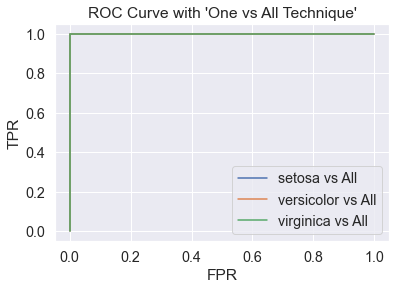

In [25]:
#ROC Curve with 'One vs All Technique':
from sklearn.metrics import roc_curve

fpr = {} #false positive rate
tpr = {} #true positive rate
threshold ={}
for i in range(3):    
    fpr[i], tpr[i], threshold[i] = roc_curve(y_test, y_probabilities[:,i], pos_label=i)
    
fig, ax = plt.subplots()
plt.plot(fpr[0], tpr[0], label="setosa vs All")
plt.plot(fpr[1], tpr[1], label="versicolor vs All")
plt.plot(fpr[2], tpr[2], label="virginica vs All")
ax.set(xlabel="FPR", ylabel="TPR", title="ROC Curve with 'One vs All Technique'")
ax.legend()
plt.show()

In [26]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probabilities, multi_class="ovo", average="weighted")

1.0

In [27]:
import warnings
warnings.filterwarnings("ignore")

#Making a Prediction:
clf.predict([[5, 5, 5, 5]])

array([2])

In [29]:
from sklearn.model_selection import RandomizedSearchCV

#Hyperparameter grid for RandomForestClassifier:
rf_grid = {"n_estimators" : np.arange(10, 1000, 50),
           "max_depth" : [None, 3, 5, 10],
           "max_features" : ['auto', 'sqrt'],
           "min_samples_split" : np.arange(2, 20, 2),
           "min_samples_leaf" : np.arange(1, 20, 2)}
rs_rf = RandomizedSearchCV(estimator = RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv= 5,
                           n_iter = 20,
                           verbose = True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [30]:
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 5}

In [31]:
rs_rf.score(X_test, y_test)

1.0

100%